In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import pandas
import matplotlib.pyplot as plt
!pip install plfit
import plfit
!pip install pyveplot
import pyveplot
from networkx.algorithms import community

     |████████████████████████████████| 193 kB 7.3 MB/s 
  Created wheel for plfit: filename=plfit-1.0.3-cp37-cp37m-linux_x86_64.whl size=123559 sha256=682651e7a984b10729467e69dd8803e72a959e4930424bc269d0f5310caa8aa6
  Stored in directory: /root/.cache/pip/wheels/44/c5/30/2761386f6aea1d7ca4ffb706f90535faa81365be034b32055a
Successfully built plfit
     |████████████████████████████████| 67 kB 2.0 MB/s 


In [ ]:
df = pd.read_csv('large_twitch_edges.csv', header=None, names=['a','b'])
#df
df = df.iloc[1: , :]
df


# use itertools to flatten our list of lists


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,a,b
1,98343,141493
2,98343,58736
3,98343,140703
4,98343,151401
5,98343,157118
...,...,...
6797553,97507,29359
6797554,71175,12020
6797555,151702,128281
6797556,118034,38021


In [ ]:
twitch = nx.from_edgelist(df.values)

In [ ]:
subset = df.sample(n=1000)
twitch2 = nx.from_edgelist(subset.values)
nodes2 = twitch2.number_of_nodes()
print(nodes2)

1879


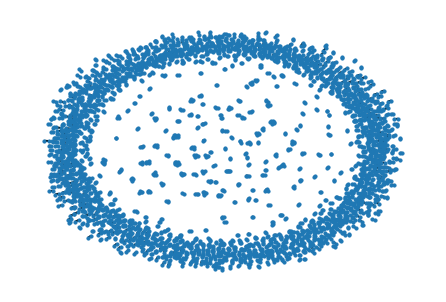

In [ ]:
g = nx.draw(twitch2, node_size=10, width = 2)


In [ ]:
nx.draw(twitch2, node_size=10, width = 2)

In [ ]:
nodes = twitch.number_of_nodes()
print(nodes)

256953


In [ ]:
edge_count = twitch.number_of_edges()

In [ ]:
A = nx.adjacency_matrix(twitch)
#b = nx.similarity_matrix(twitch)
#print(A)

In [ ]:
a = A.todense()
print(a)

In [ ]:
avg_deg = 2*edge_count /nodes
print(avg_deg)

52.90895222083416


In [ ]:
df_degree = pd.DataFrame(twitch.degree(), columns=["node", "degree"])
df_degree.head()

,node,degree
0,98343,39
1,141493,4456
2,58736,420
3,140703,242
4,151401,235


In [ ]:
first = df_degree.iloc[:, 0]
second = df_degree.iloc[:, 1]
print(first)
#df.sum(first)

0          98343
1         141493
2          58736
3         140703
4         151401
           ...  
256948    131422
256949    102494
256950    157597
256951    128281
256952    118034
Name: node, Length: 256953, dtype: object


In [ ]:
degree_count = df_degree.groupby('degree')['degree'].count()
degree_dist = pd.DataFrame({'n':degree_count})

In [ ]:
degree_dist['p'] = degree_dist['n']/degree_dist['n'].sum()
degree_dist['cdf'] = np.cumsum(degree_dist['p'])
degree_dist['ccdf'] = 1-degree_dist['cdf']
degree_distcc = degree_dist['ccdf']
degree_distcc = degree_distcc.drop(degree_distcc.index[1794])
print(degree_distcc)

degree
1        8.565769e-01
2        7.654629e-01
3        7.025876e-01
4        6.559721e-01
5        6.208334e-01
             ...     
22628    1.556705e-05
29912    1.167529e-05
30474    7.783525e-06
31064    3.891762e-06
35227   -2.597922e-14
Name: ccdf, Length: 1799, dtype: float64


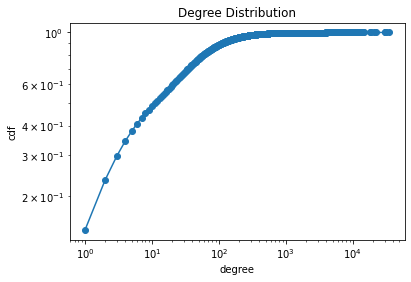

In [ ]:
plt.plot(degree_dist.index, degree_dist['cdf'])
plt.scatter(degree_dist.index, degree_dist['cdf'])
plt.xlabel('degree')
plt.ylabel('cdf')
plt.yscale('log')
plt.xscale('log')
plt.title("Degree Distribution")
plt.show()

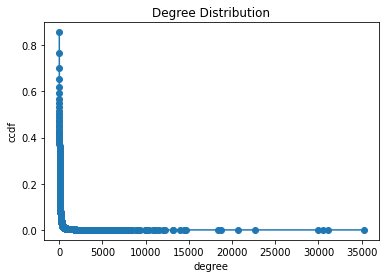

In [ ]:
plt.plot(degree_dist.index, degree_dist['ccdf'])
plt.scatter(degree_dist.index, degree_dist['ccdf'])
plt.xlabel('degree')
plt.ylabel('ccdf')
#plt.yscale('log')
#plt.xscale('log')
plt.title("Degree Distribution")
plt.show()

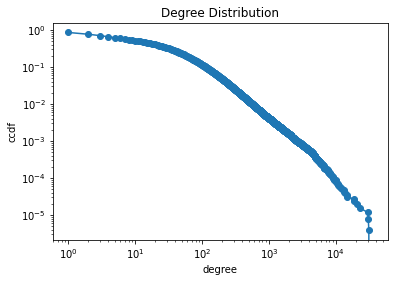

In [ ]:
plt.plot(degree_dist.index, degree_dist['ccdf'])
plt.scatter(degree_dist.index, degree_dist['ccdf'])
#plt.plot(degree_distcc.index, degree_distcc)
#plt.scatter(degree_distcc.index, degree_distcc)
plt.xlabel('degree')
plt.ylabel('ccdf')
plt.yscale('log')
plt.xscale('log')
plt.title("Degree Distribution")
plt.show()

In [ ]:
sum(degree_dist['p'])

1.000000000000026

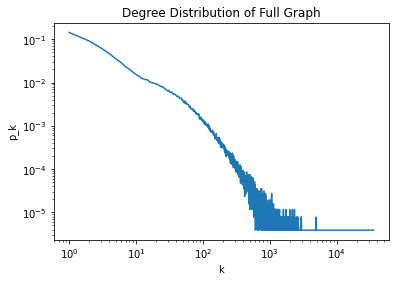

In [ ]:
plt.plot(degree_dist.index, degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("p_k")
plt.title("Degree Distribution of Full Graph")
plt.show()

In [ ]:
# this function gets us the matrix to a power
print(np.linalg.matrix_power(A,2))
# check that the diagonal elements equal the node degrees for A^2
print(ba_net.degree())

LinAlgError: ignored

In [ ]:
shortest_paths(net = twitch, k = 1, i = 2, j = 3)

In [ ]:
def shortest_paths(net,k, i, j):
  A = nx.to_numpy_matrix(net)
  A_k = np.linalg.matrix_power(A,k)
  return(A_k[(i-1),(j-1)])

KeyboardInterrupt: ignored

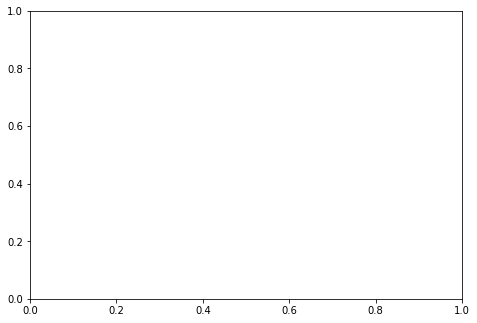

In [ ]:
G = nx.draw(twitch, node_size=20, width = 2)
#plt.show()

In [ ]:
# get degrees so we can plot the distribution using the code from week 3
twitch_degrees = [val for (node, val) in twitch.degree()]
#print(twitch_degrees)

In [ ]:
# Getting the degree distribution
degree_df = pd.DataFrame(twitch_degrees, columns = ["degree"]) # create data frame with degree of each node as a column
degree_count = degree_df.groupby('degree')['degree'].count() # get the number of nodes with each degree
degree_dist = pd.DataFrame({'n':degree_count}) # convert to dataframe
degree_dist['p'] = degree_dist['n']/degree_dist['n'].sum() # add probability that a node chosen at random is that degree
print(degree_dist)

            n         p
degree                 
1       36853  0.143423
2       23412  0.091114
3       16156  0.062875
4       11978  0.046616
5        9029  0.035139
...       ...       ...
22628       1  0.000004
29912       1  0.000004
30474       1  0.000004
31064       1  0.000004
35227       1  0.000004

[1800 rows x 2 columns]


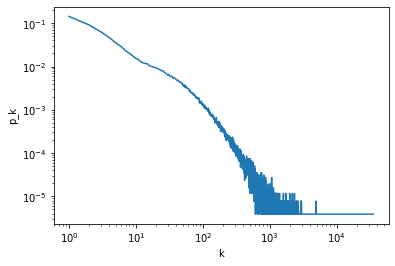

In [ ]:
plt.plot(degree_dist.index,degree_dist['p'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel("k")
plt.ylabel("p_k")
plt.show()

In [ ]:
twitch_multi = A>1 # this leaves us with a sparse matrix with true in the place where there is a multi-link
multi_edge_count = twitch_multi.sum()/2 # every edge appears twice in the matrix
percent_multi_edges = 100*multi_edge_count/edge_count
print(str(percent_multi_edges)+ "% multi-links.")

0.0% multi-links.


Using DISCRETE fitter because there are repeated values.
alpha = 2.527264   xmin = 238.000000   ksD = 0.005781   L = -64400.955557   (n<x) = 247343  (n>=x) = 9610


Text(0, 0.5, 'p_k')

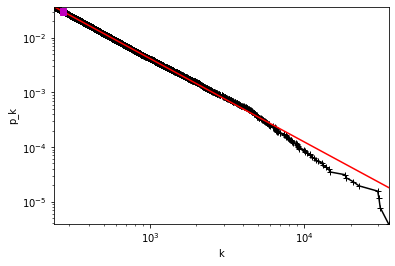

In [ ]:
def power_law_fit(net):
  degrees = [val for (node, val) in net.degree()]
  myplfit = plfit.plfit(degrees, usefortran=False, verbose=True)
  return(myplfit)
fit1 = power_law_fit(twitch)
fit1.plotcdf()
plt.xlabel("k")
plt.ylabel("p_k")


In [ ]:
print("The clustering coefficient is " + str(nx.average_clustering(twitch2)))

The clustering coefficient is 0.0


In [ ]:
    from pyveplot import Hiveplot, Axis, Node
    import networkx as nx
    import random
    c = ['#e41a1c', '#377eb8', '#4daf4a',
         '#984ea3', '#ff7f00', '#ffff33',
         '#a65628', '#f781bf', '#999999',]
    # create hiveplot object
    h = Hiveplot()

    # create three axes, spaced at 120 degrees from each other
    h.axes = [Axis(start=20, angle=0,
                   stroke=random.choice(c), stroke_width=1.1),
              Axis(start=20, angle=120,
                   stroke=random.choice(c), stroke_width=1.1),
              Axis(start=20, angle=120 + 120,
                   stroke=random.choice(c), stroke_width=1.1)
              ]

    # create a random Barabasi-Albert network
    #g = nx.barabasi_albert_graph(100, 2)

    # sort nodes by degree
    k = list(nx.degree(twitch))
    k.sort(key=lambda tup: tup[1])

    # categorize them as high, medium and low degree
    hi_deg = [v[0] for v in k if v[1] > 7]
    md_deg = [v[0] for v in k if v[1] > 3 and v[1] <= 7]
    lo_deg = [v[0] for v in k if v[1] <= 3]

    # place these nodes into our three axes
    for axis, nodes in zip(h.axes,
                           [hi_deg, md_deg, lo_deg]):
        circle_color = random.choice(c)
        for v in nodes:
            # create node object
            node = Node(radius=twitch.degree(v),
                        label="node %s k=%s" % (v, twitch.degree(v)))
            # add it to axis
            axis.add_node(v, node)
            # once it has x, y coordinates, add a circle
            node.add_circle(fill=circle_color, stroke=circle_color,
                            stroke_width=0.1, fill_opacity=0.7)
            if axis.angle < 180:
                orientation = -1
                scale = 0.6
            else:
                orientation = 1
                scale = 0.35
            # also add a label
            node.add_label("node %s k=%s" % (v, twitch.degree(v)),
                           angle=axis.angle + 90 * orientation,
                           scale=scale)

    # iterate through axes, from left to right
    for n in range(-1, len(h.axes) - 1):
        curve_color = random.choice(c)
        # draw curves between nodes connected by edges in network
        h.connect_axes(h.axes[n],
                       h.axes[n+1],
                       twitch.edges,
                       stroke_width=0.5,
                       stroke=curve_color)

    # save output
    h.save('ba_hiveplot.svg')

ModuleNotFoundError: ignored

In [ ]:
!pip install scipy.spatial.distance
from scipy.spatial.distance import squareform
dist_array = squareform(A) #https://stackoverflow.com/questions/18952587/use-distance-matrix-in-scipy-cluster-hierarchy-linkage

plt.figure(figsize=(10,10)) 
mergings = linkage(dist_array, method='complete', metric='euclidean')
dendrogram(mergings, labels = distances.index, leaf_rotation=90, leaf_font_size=14)
plt.show()

ERROR: Could not find a version that satisfies the requirement scipy.spatial.distance (from versions: none)
ERROR: No matching distribution found for scipy.spatial.distance


NameError: ignored

<Figure size 720x720 with 0 Axes>

In [ ]:
import plotly.figure_factory as ff


In [ ]:
fig = ff.create_dendrogram(g)
#fig.update_layout(width=800, height=500)
#fig.show()

AttributeError: ignored

In [ ]:
#G=nx.erdos_renyi_graph(100, 0.01)
dendrogram = generate_dendrogram(g)

NameError: ignored

In [ ]:
partition = community_louvain.best_partition(twitch_graph)


AttributeError: ignored

In [ ]:
community.best_partition(nx.twitch_graph)

NameError: ignored

In [ ]:
gn_communities = community.girvan_newman(twitch2) # iterator
gn_communities_1 = tuple(sorted(c) for c in next(gn_communities))
print(tuple(sorted(c) for c in next(gn_communities)))
print(tuple(sorted(c) for c in next(gn_communities)))

([55139, 85877, 149215], [127771, 144572], [897, 31087], [41058, 95019], [152820, 159236], [30309, 152904], [61405, 149123], [104821, 110321], [24715, 73082], [15542, 167889], [69401, 77585], [94584, 165701], [926, 83541], [20261, 150555], [95114, 152817], [44541, 113032], [42177, 143203], [95339, 138810], [152620, 163590], [77138, 90552], [23124, 94507], [24635, 120019], [53912, 110345, 140905, 158539], [54669, 142650], [51494, 75444], [72427, 119633], [61416, 68856, 75135, 78367], [45955, 95527], [25088, 124820, 149329, 166908], [56683, 122230], [26845, 134305], [74459, 148141], [21884, 163304], [66524, 89911, 103680], [36148, 46582], [100472, 128250, 156782], [76848, 142187], [26707, 91182], [15916, 71308], [88732, 113016, 117878], [886, 10501], [44929, 114587], ['125642', '131647', '14842', '71380', '85809'], [81033, 158657], [80558, 98469], [94108, 112142, 130463], ['100671', '22729', '35358'], [59505, 88198], [20055, 79424, 90938], [84769, 133726], [13841, 135624], [72621, 131179

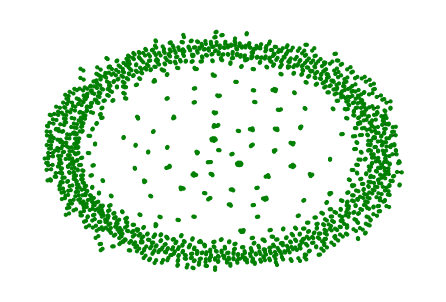

In [ ]:
gn_colour_map = ['red' if i in gn_communities_1[0] else 'green' for i in range(twitch2.order())]
nx.draw(twitch2, node_color = gn_colour_map, with_labels=False, node_size=10, width = 2)

In [ ]:
g_communities = community.greedy_modularity_communities(g)
g_colour_map = ['red' if i in sorted(g_communities[0]) else 'green' for i in range(twitch2.order())]
g_colour_map = ['blue' if i in sorted(g_communities[2]) else g_colour_map[i] for i in range(twitch2.order())]
nx.draw(twitch2, node_color = g_colour_map, with_labels=False, node_size=10, width = 2)

AttributeError: ignored